In [64]:
import os
import gc
import joblib
import warnings
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings("ignore")

sns.set_style("whitegrid")

data_path = "../datasets/loan_approval_dataset_updated.csv"

In [4]:
df = pd.read_csv(data_path, encoding='latin-1', sep=";")

df.columns = df.columns.map(lambda x: x.strip())

df.head()

,loan_id,no_of_dependents,City,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Ankara,Graduate,No,9600000,29900000,12,778.0,2400000.0,17600000,22700000,8000000,Approved
1,2,0,Ankara,Not Graduate,Yes,4100000,12200000,8,417.0,2700000.0,2200000,8800000,3300000,Rejected
2,3,3,Ankara,Graduate,No,9100000,29700000,20,NaN,7100000.0,4500000,33300000,12800000,Rejected
3,4,3,Ankara,Graduate,No,8200000,30700000,8,NaN,18200000.0,3300000,23300000,7900000,Rejected
4,5,5,Ankara,Not Graduate,Yes,9800000,24200000,20,NaN,12400000.0,8200000,29400000,5000000,Rejected


In [5]:
df.tail()

,loan_id,no_of_dependents,City,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4264,4265,5,Ýzmir,Graduate,Yes,1000000,2300000,12,317.0,2800000.0,500000,3300000,800000,Rejected
4265,4266,0,Ýzmir,Not Graduate,Yes,3300000,11300000,20,559.0,4200000.0,2900000,11000000,1900000,Approved
4266,4267,2,Ýzmir,Not Graduate,No,6500000,23900000,18,457.0,1200000.0,12400000,18100000,7300000,Rejected
4267,4268,1,Ýzmir,Not Graduate,No,4100000,12800000,8,780.0,8200000.0,700000,14100000,5800000,Approved
4268,4269,1,Ýzmir,Graduate,No,9200000,29700000,10,607.0,17800000.0,11800000,35700000,12000000,Approved


In [6]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,3885.000000,4.146000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,598.538996,7.490207e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.283909,6.515407e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,451.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,597.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,745.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


## Missing Values

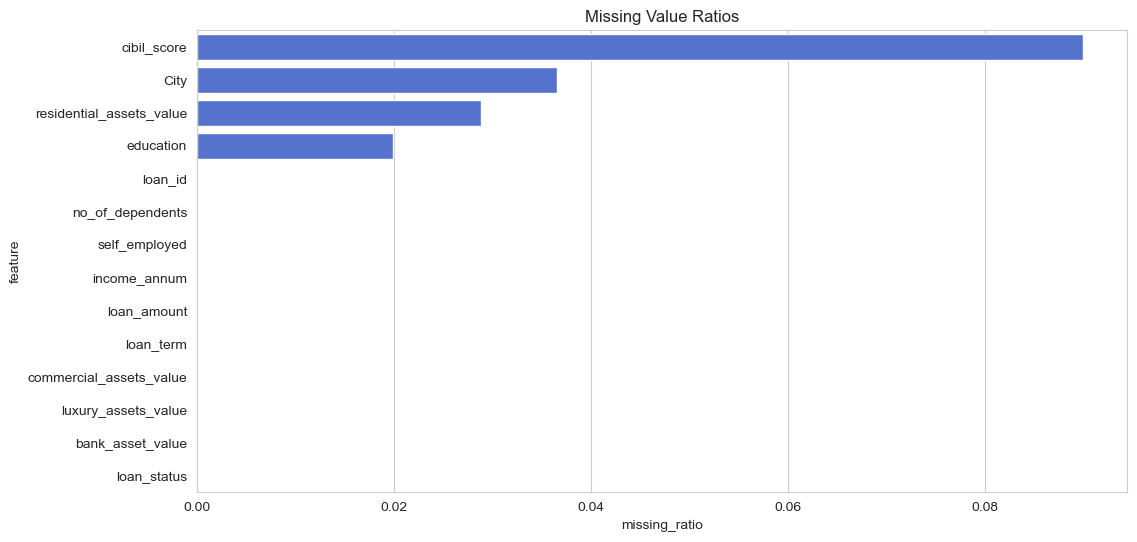

In [7]:
missing_df = (
    pd.DataFrame(
        {
            "feature": [col for col in df.columns],
            "missing_cnt": [df[col].isnull().sum() for col in df.columns],
            "missing_ratio": [
                df[col].isnull().sum() / df.shape[0] for col in df.columns
            ],
        }
    )
    .sort_values(by="missing_ratio", ascending=False)
    .reset_index(drop=True)
)

plt.figure(figsize=(12, 6))

sns.barplot(data=missing_df, y="feature", x="missing_ratio", color="royalblue")

plt.title("Missing Value Ratios", size=12)

plt.savefig("../images/missing_values.jpg", dpi=500)

plt.show()


## Feature Distributions

In [40]:
num_cols = ["income_annum", "loan_amount", "loan_term", "cibil_score",
            "residential_assets_value", "luxury_assets_value", "bank_asset_value"]
cat_cols = ["no_of_dependents", "City", "education", "self_employed"]

<Figure size 640x480 with 0 Axes>

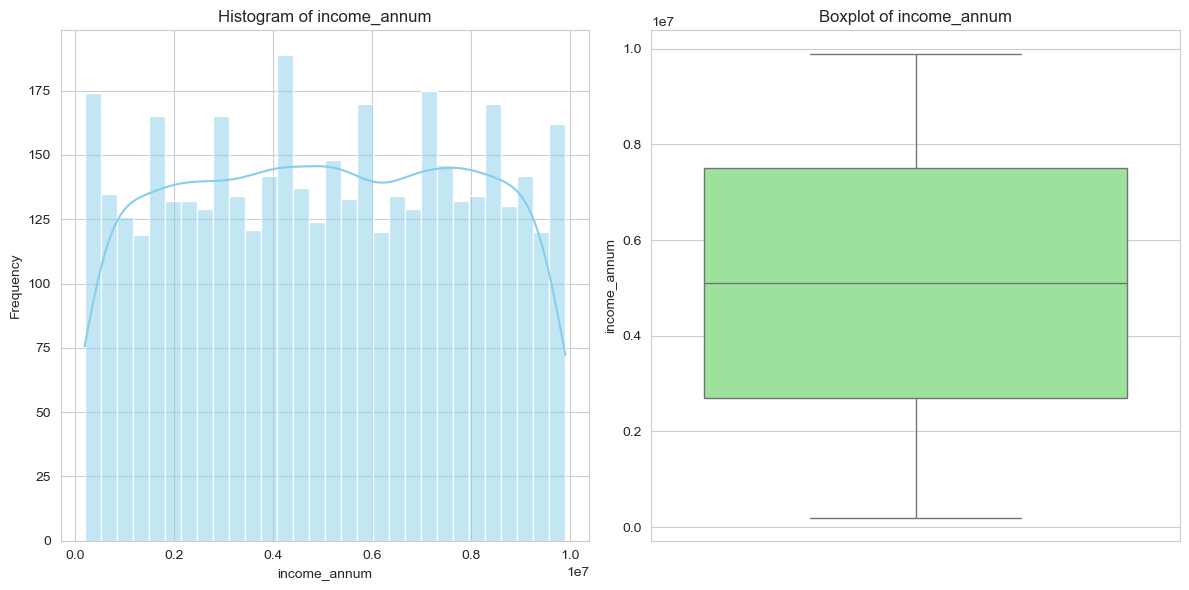

<Figure size 640x480 with 0 Axes>

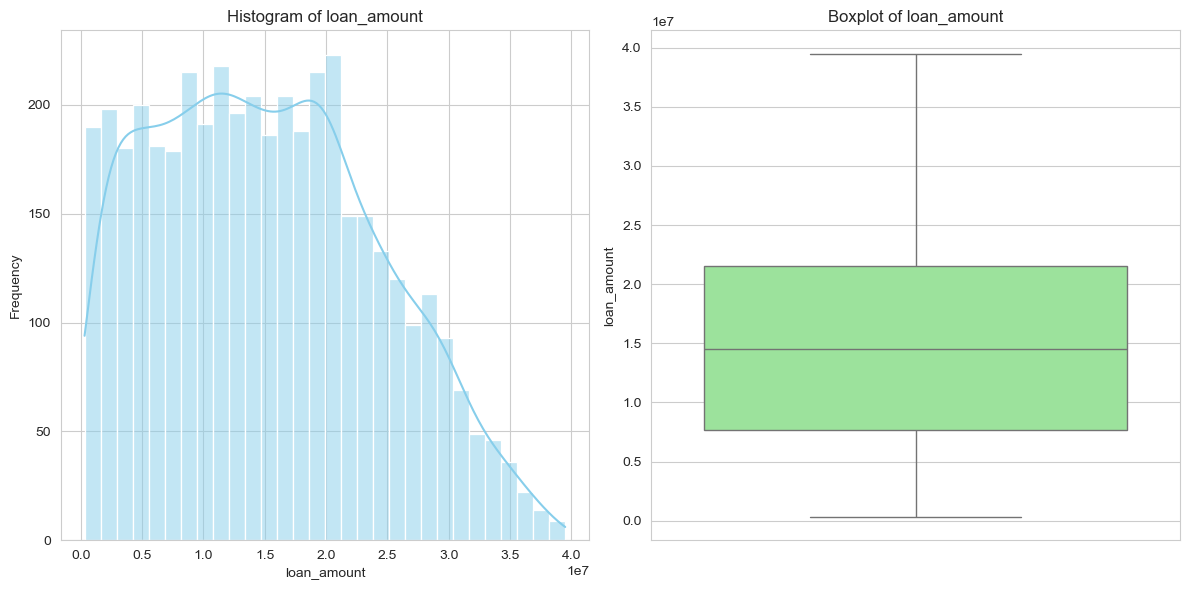

<Figure size 640x480 with 0 Axes>

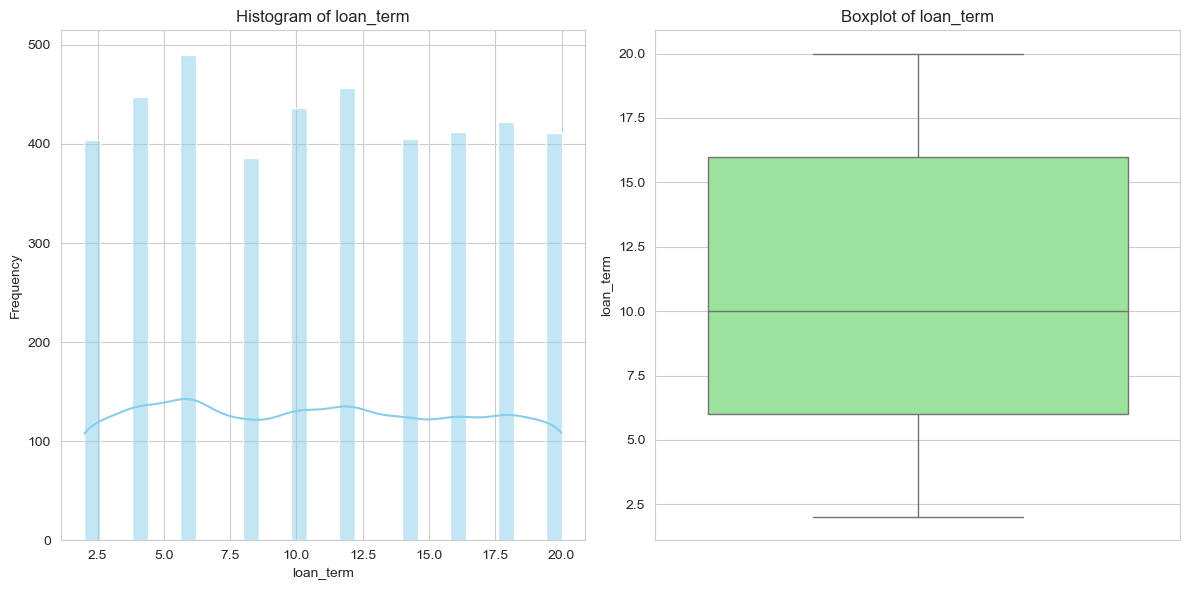

<Figure size 640x480 with 0 Axes>

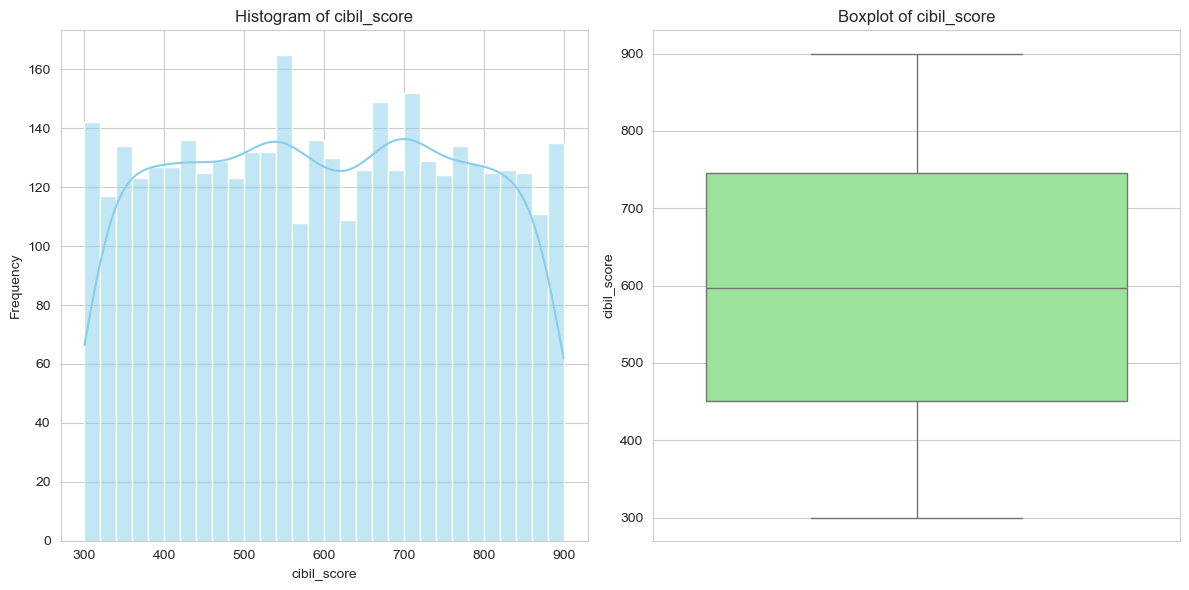

<Figure size 640x480 with 0 Axes>

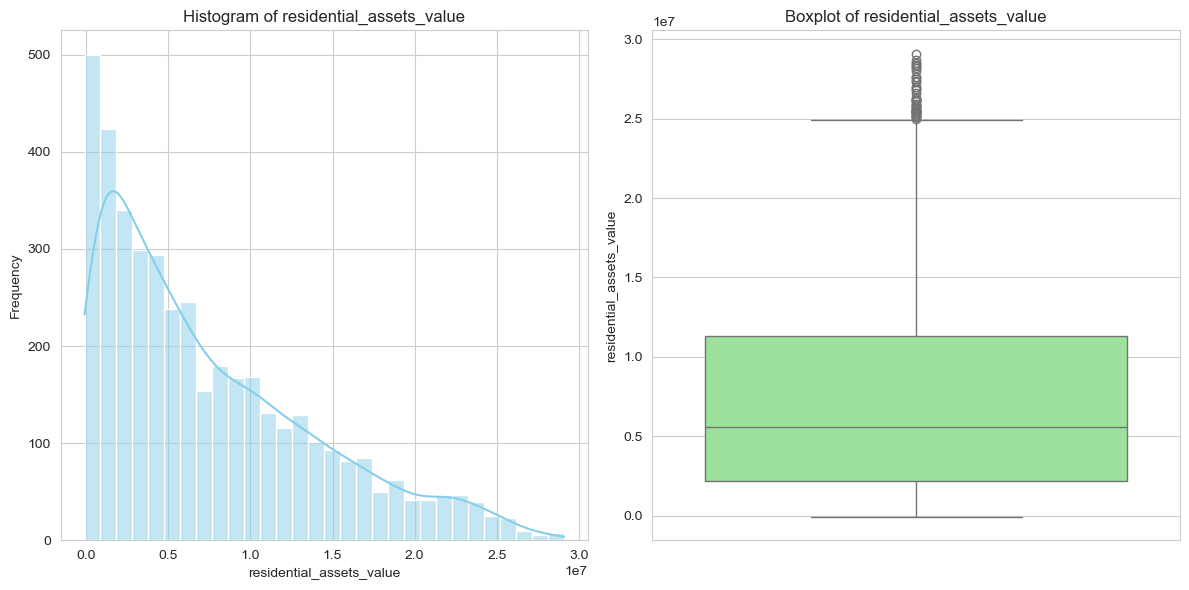

<Figure size 640x480 with 0 Axes>

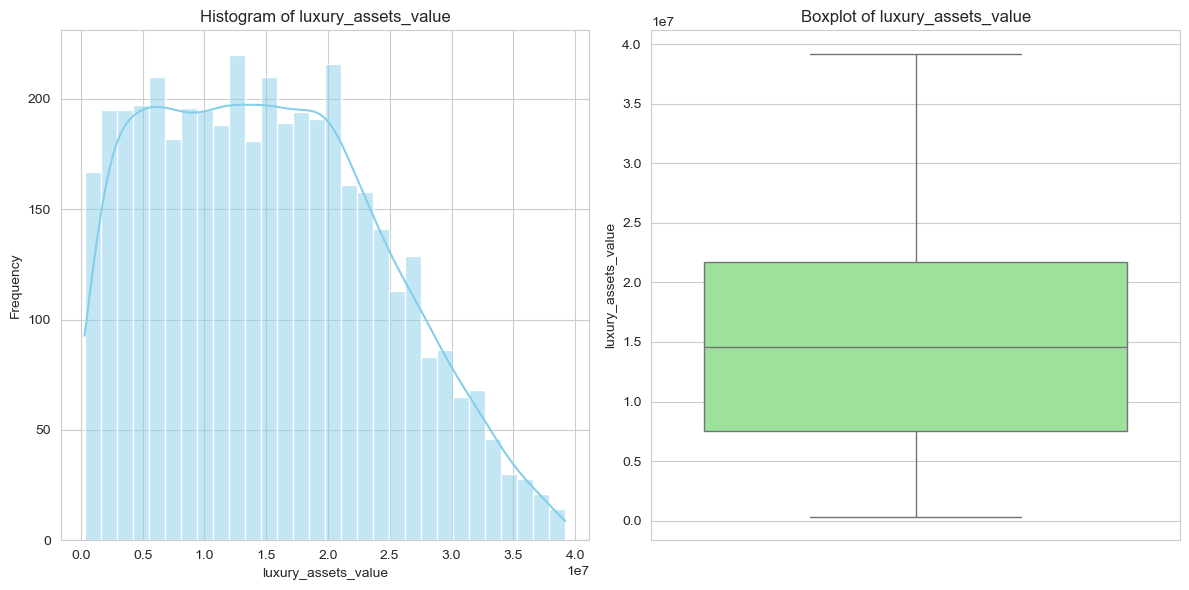

<Figure size 640x480 with 0 Axes>

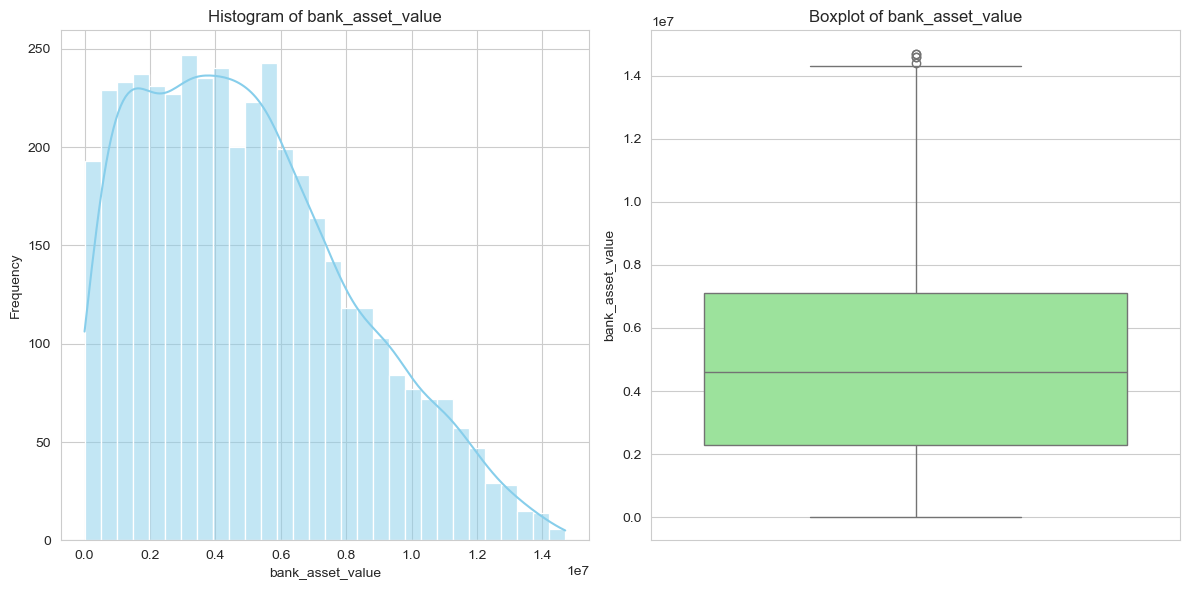

In [69]:
def num_analyser(data: pd.DataFrame, feature_name: str, save_path=None, dpi=500) -> None:

    if feature_name not in data.columns:
        raise ValueError(f"Feature '{feature_name}' not found in the DataFrame.")

    if not pd.api.types.is_numeric_dtype(data[feature_name]):
        raise ValueError(f"Feature '{feature_name}' is not numeric.")
    
    sns.set_style("whitegrid")
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(data[feature_name], kde=True, color='skyblue', bins=30)
    plt.title(f'Histogram of {feature_name}')
    plt.xlabel(feature_name)
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[feature_name], color='lightgreen')
    plt.title(f'Boxplot of {feature_name}')
    plt.ylabel(feature_name)

    plt.tight_layout()
    plt.show()

    if save_path is not None:
        plt.savefig(save_path, dpi=dpi)

    matplotlib.rc_file_defaults()
    sns.reset_orig()

for col in num_cols:
    num_analyser(df, col, f"../images/{col}_dist.jpg")

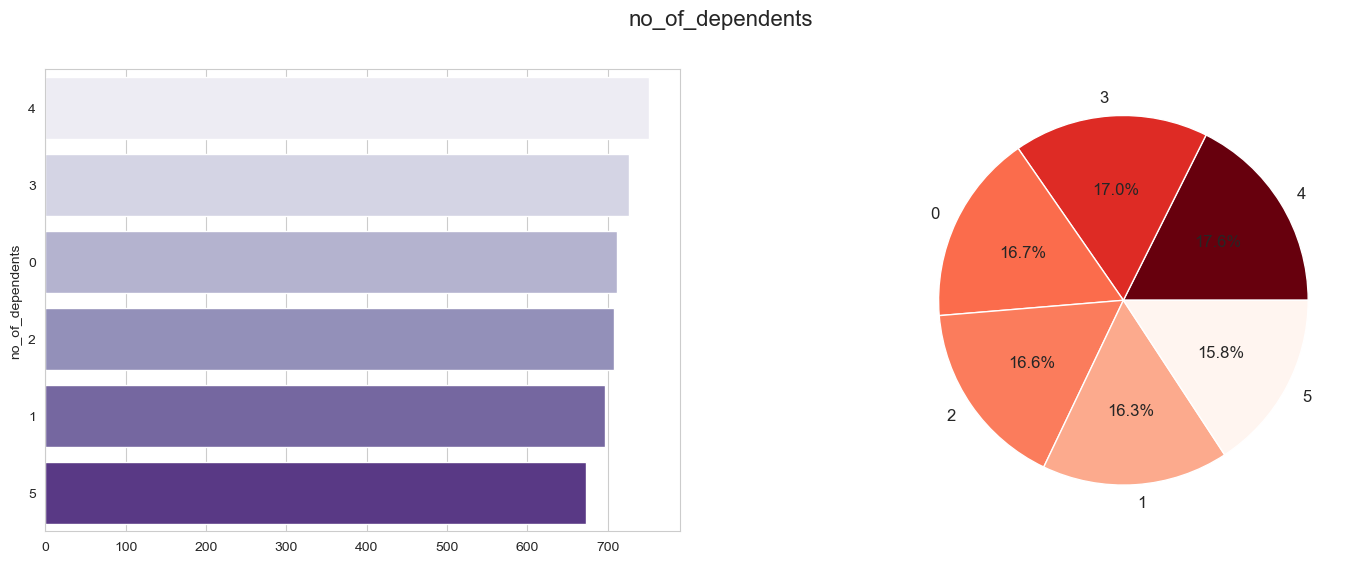

<Figure size 640x480 with 0 Axes>

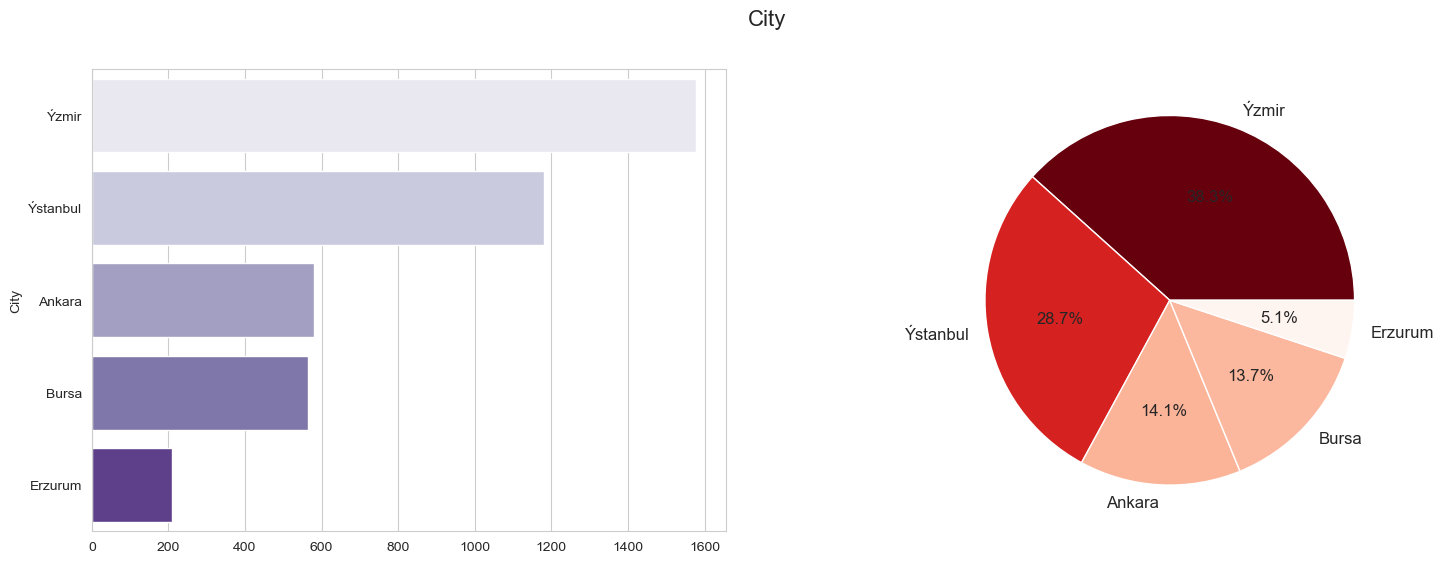

<Figure size 640x480 with 0 Axes>

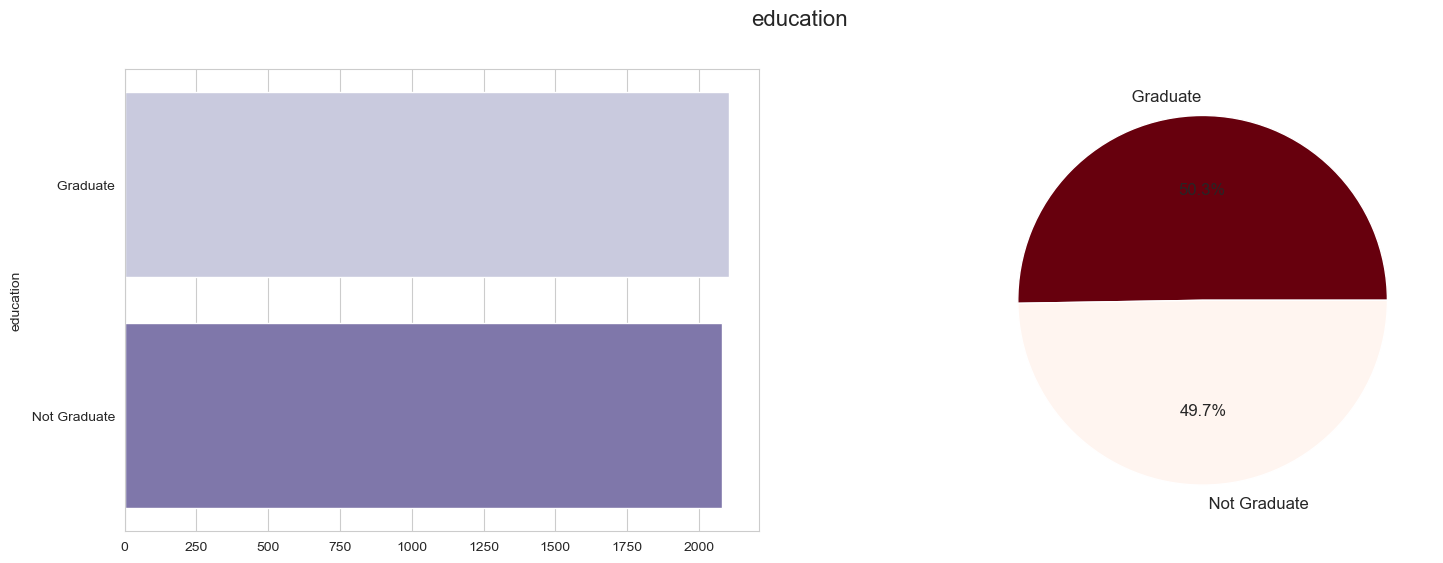

<Figure size 640x480 with 0 Axes>

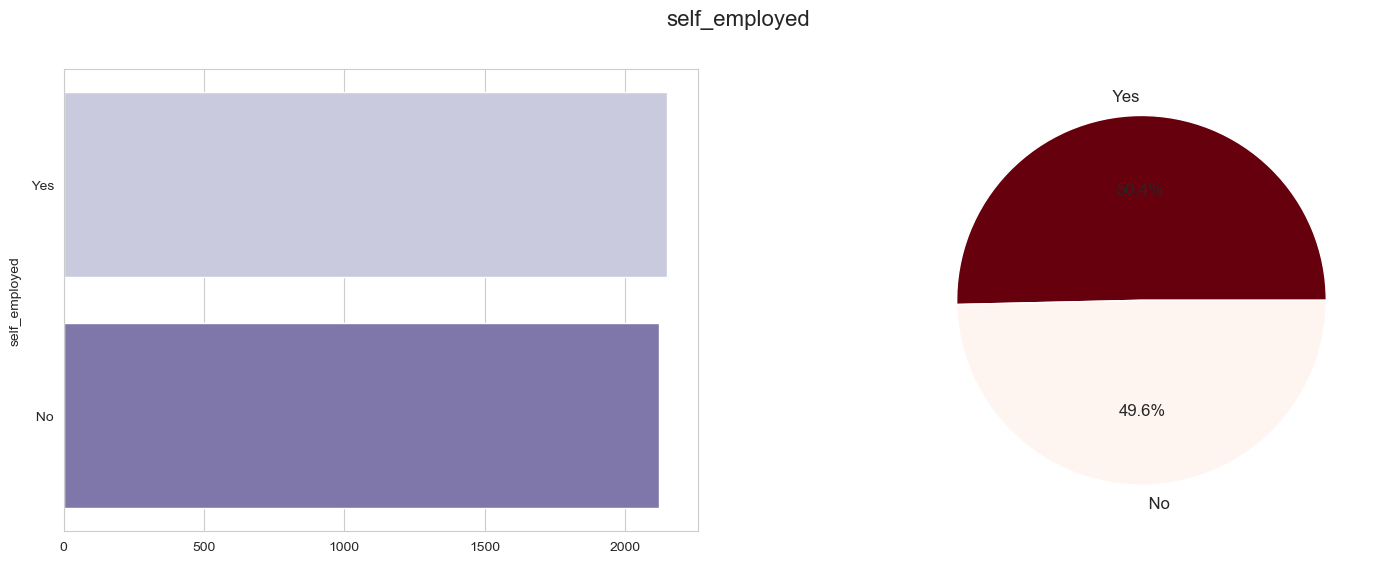

In [68]:
def cat_analyser(data, col, freq_limit=100, save_path=None, dpi=500):
    df_ = data.copy()
    sns.set_style("whitegrid")
    if df_[col].nunique() > freq_limit:
        df_ = df_.loc[df_[col].isin(df_[col].value_counts(). \
                                    keys()[:freq_limit].tolist())]
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))
    fig.suptitle(col, fontsize = 16)
    sns.countplot(data = df_,
                  y = col,
                  ax = ax[0],
                  palette= "Purples",
                  order =  df_[col].value_counts().index)
    ax[0].set_xlabel('')
    pie_cmap = plt.get_cmap("Reds")
    normalize = lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)) 
    data[col].value_counts().plot.pie(autopct = '%1.1f%%',
                                      textprops = {'fontsize': 12},
                                      ax = ax[1],
                                      colors = pie_cmap(normalize(df_[col].value_counts())))
    ax[1].set_ylabel('')
    plt.show()

    if save_path is not None:
        plt.savefig(save_path, dpi=dpi)

    matplotlib.rc_file_defaults()
    sns.reset_orig()
    del df_
    _ = gc.collect()

for col in cat_cols:
    cat_analyser(df, col, 10, f"../images/{col}_dist.jpg")

## Target Distriution

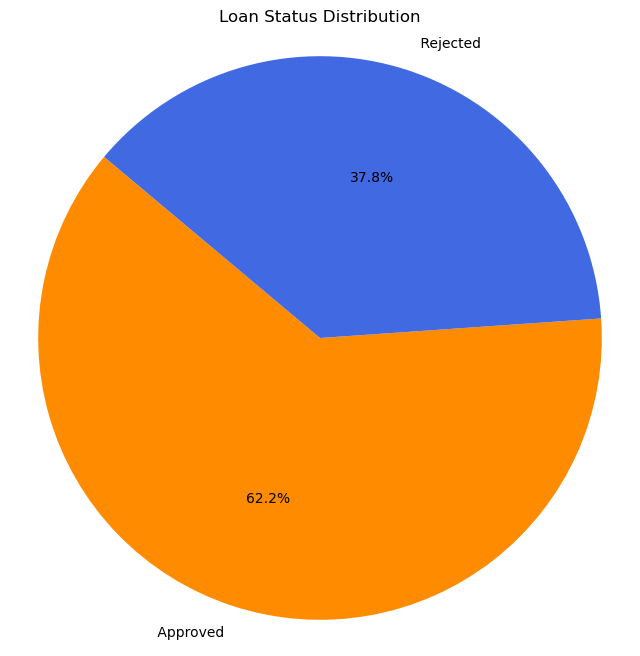

In [49]:
plt.figure(figsize=(8, 8))
plt.pie(
    df["loan_status"].value_counts().values, 
    labels=df["loan_status"].value_counts().keys(),
    colors=["darkorange", "royalblue"],
    autopct='%1.1f%%',
    startangle=140,
    shadow=False
)

plt.axis('equal')  
plt.title('Loan Status Distribution', size = 12)
plt.savefig(f"../images/loan_status_dist.jpg", dpi=500)
plt.show()

## Correlation Coefficients

In [8]:
def corr_map(
    dataframe: pd.DataFrame,
    method="pearson",
    cmap: str = "coolwarm",
    title=None,
    save_path=None,
    dpi: int = 2000,
) -> None:

    assert method in ["pearson", "spearman", "kendall"], "Invalid Correlation Method"
    corr_ = dataframe.select_dtypes(include=["int", "float"]).corr(method=method)
    matrix = np.triu(corr_)

    matplotlib.rc_file_defaults()
    sns.reset_orig()

    f, ax = plt.subplots(figsize=(matrix.shape[0] * 0.55, matrix.shape[1] * 0.55))
    sns.heatmap(
        corr_,
        annot=True,
        fmt=".2f",
        cbar=False,
        ax=ax,
        mask=matrix,
        cmap=cmap,
        linewidth=0.4,
        linecolor="white",
        annot_kws={"size": 10},
    )

    plt.xticks(rotation=90, size=12)
    plt.yticks(rotation=0, size=12)
    plt.title(f"{method.title()} Correlation Map" if title == None else title, size=14)

    if save_path is not None:
        plt.savefig(save_path, dpi=dpi)
    plt.show()

In [42]:
corr_df = pd.get_dummies(data=df, columns=["City"], dtype="int32")

le_features = ["education", "self_employed", "loan_status"]
for f in le_features:
    enc = LabelEncoder()
    corr_df[f] = enc.fit_transform(corr_df[f])
    #joblib.dump(enc, f'../models/{f}_label_encoder.pkl')

corr_df.drop(columns=["loan_id"], axis=1, inplace=True)

corr_df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,City_Ankara,City_Bursa,City_Erzurum,City_Ýstanbul,City_Ýzmir
0,2,0,0,9600000,29900000,12,778.0,2400000.0,17600000,22700000,8000000,0,1,0,0,0,0
1,0,1,1,4100000,12200000,8,417.0,2700000.0,2200000,8800000,3300000,1,1,0,0,0,0
2,3,0,0,9100000,29700000,20,NaN,7100000.0,4500000,33300000,12800000,1,1,0,0,0,0
3,3,0,0,8200000,30700000,8,NaN,18200000.0,3300000,23300000,7900000,1,1,0,0,0,0
4,5,1,1,9800000,24200000,20,NaN,12400000.0,8200000,29400000,5000000,1,1,0,0,0,0


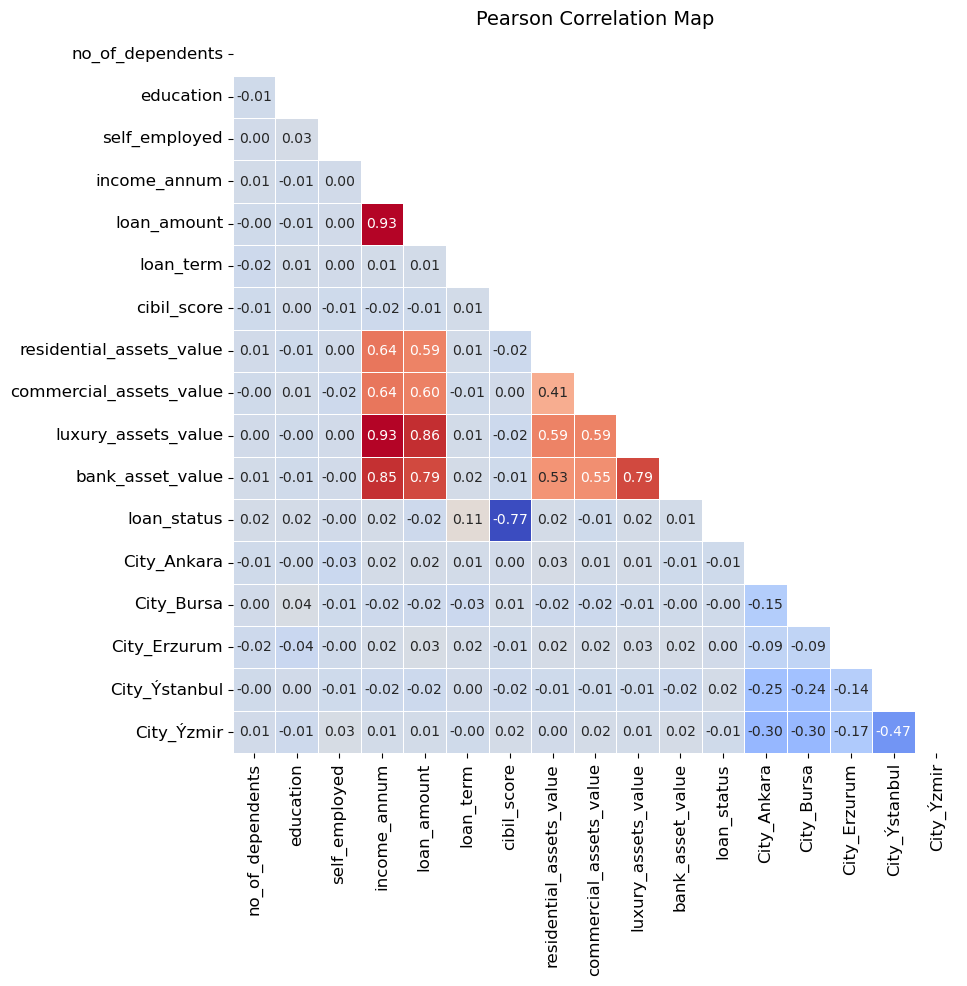

In [50]:
corr_map(corr_df, method="pearson", save_path="../images/pearson_corr_map.jpg", dpi=500)

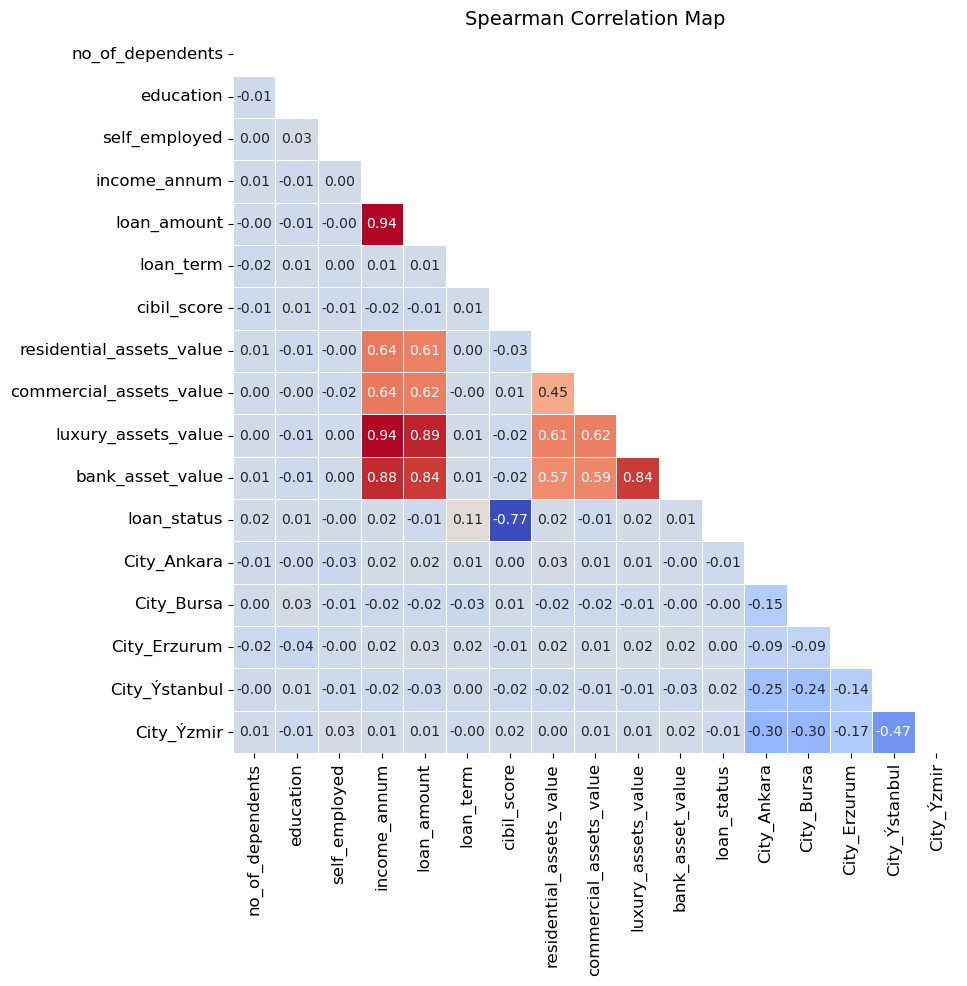

In [20]:
corr_map(corr_df, method="spearman", save_path="../images/spearman_corr_map.jpg", dpi=500)

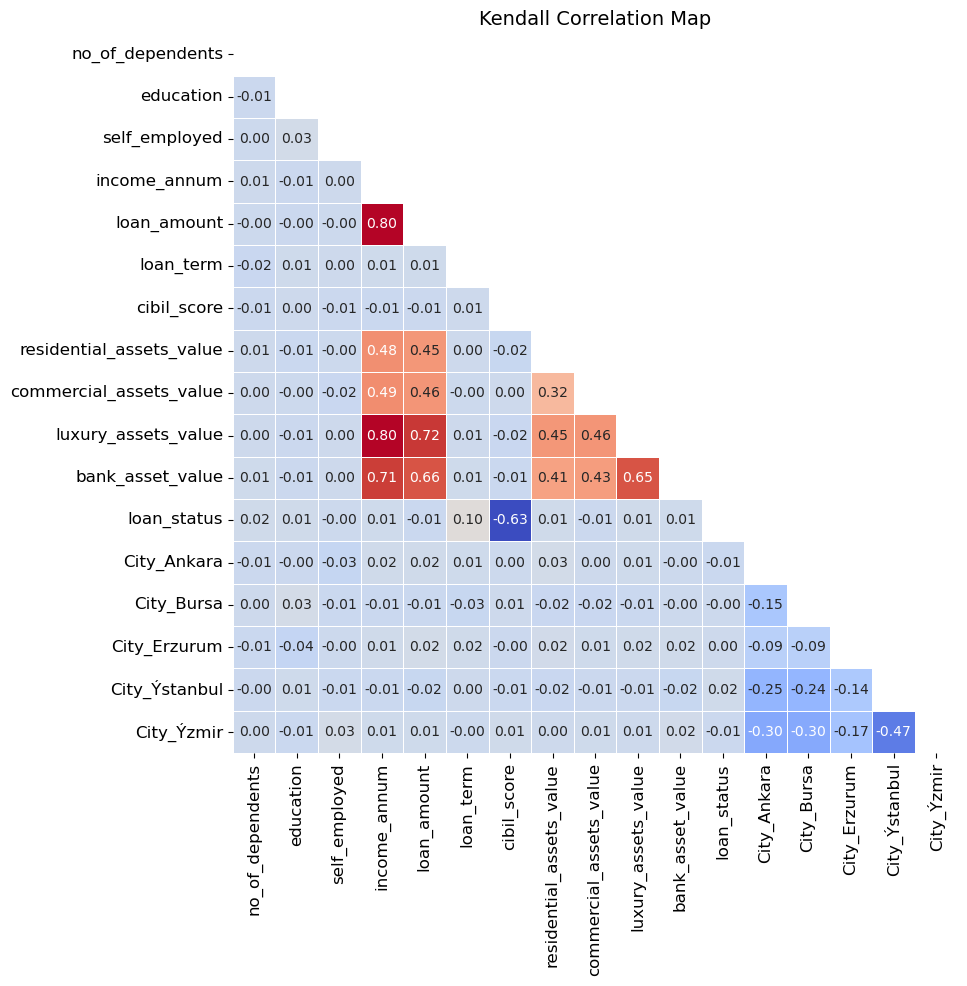

In [21]:
corr_map(corr_df, method="kendall", save_path="../images/kendall_corr_map.jpg", dpi=500)